In [1]:
#magic function to update files automatically
%load_ext autoreload
%autoreload 2

In [2]:
#all needed imports
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from scipy import stats
from utils import Experiemnt

# Line analysis

#### Load Data

In [3]:
results_dir = "results/"
#load all experiments
experiments = [Experiemnt(results_dir + x) for x in os.listdir(results_dir)]

In [4]:
experiments[0].__dict__.keys()

dict_keys(['collision_probability', 'values', 'num_nodes', 'edge_prob', 'network_size', 'seed', 'num_permutations'])

#### Find Basic Configuration 

In [5]:
# get mode of each paramter

params = ["num_nodes", "edge_prob", "network_size", "seed", "num_permutations"]

config = {}

for param_name in params:
    param_values = np.array([x.__dict__[param_name] for x in experiments])
    param_most_freq = stats.mode(param_values)[0]

    config[param_name] = param_most_freq

#### Show results

In [6]:
def get_line_results(experiments, basic_config, changed_param_name):
    results = {}
    for param_value in np.unique([x.__dict__[changed_param_name] for x in experiments]):
        config = basic_config.copy()
        config[changed_param_name] = param_value
        #read collision probability from experiments with given config
        results[param_value] = [x.collision_probability for x in experiments if all([x.__dict__[param_name] == config[param_name] for param_name in config.keys()])][0]
    return results

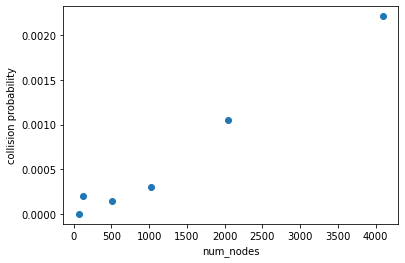

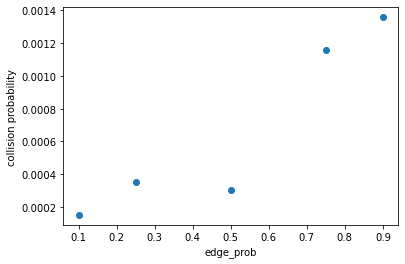

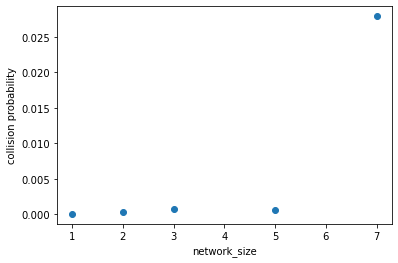

In [7]:
configurable_params = ["num_nodes", "edge_prob", "network_size"]

for param_name in configurable_params:
    param_change_results = get_line_results(experiments, config, param_name)
    # plot collision probability by param_value
    plt.scatter(list(param_change_results.keys()), list(param_change_results.values()))
    # TODO: add x label and y label
    plt.xlabel(param_name)
    plt.ylabel("collision probability")
    plt.show()

# Grid Experiments

#### Load Data

In [3]:
results_dir = "results_grid_test/"
#load all experiments
experiments = [Experiemnt(results_dir + x) for x in os.listdir(results_dir)]

#### Show results

In [21]:
from utils import collision_probability, collision_count


foo = {"collision_probability": collision_probability,
       "collision_count": collision_count}
def get_grid_results(experiments, param_name, value_name="collision_probability"):
    results = {}
    for param_value in np.unique([getattr(x, param_name) for x in experiments]):
        results[param_value] = np.mean([getattr(x, value_name, foo[value_name](x.values)) for x in experiments 
                                            if getattr(x, param_name) == param_value])
    return results


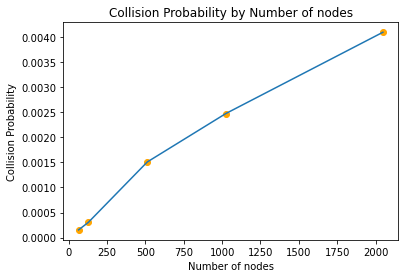

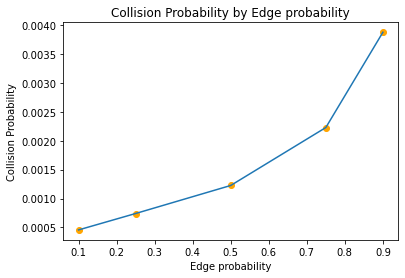

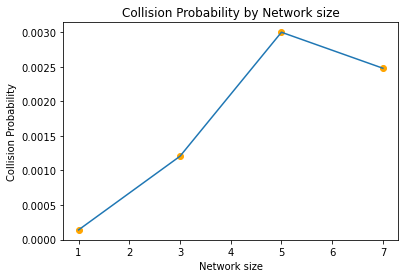

In [26]:
configurable_params = ["num_nodes", "edge_prob", "network_size"]

pretty_names = {"num_nodes": "Number of nodes", "edge_prob": "Edge probability", "network_size": "Network size"}

for param_name in configurable_params:
    param_change_results = get_grid_results(experiments, param_name)
    # plot collision probability by param_value
    plt.scatter(list(param_change_results.keys()), list(param_change_results.values()), c="orange")
    plt.plot(list(param_change_results.keys()), list(param_change_results.values()))
    # TODO: add x label and y label
    plt.xlabel(pretty_names[param_name])
    plt.ylabel("Collision Probability")
    plt.title("Collision Probability by " + pretty_names[param_name])
    #make dir if not exists
    if not os.path.exists("figures"):
        os.mkdir("figures")
    plt.savefig("figures/" + "Collision Probability" + "_" +  param_name + ".png")
    plt.show()

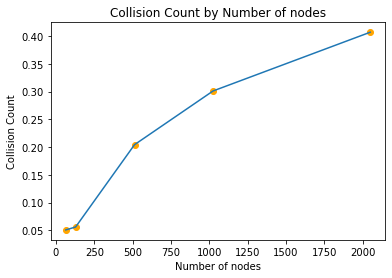

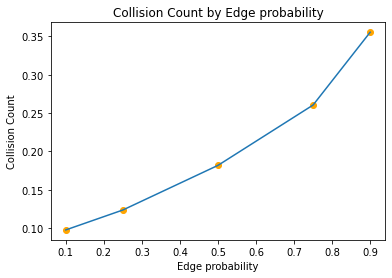

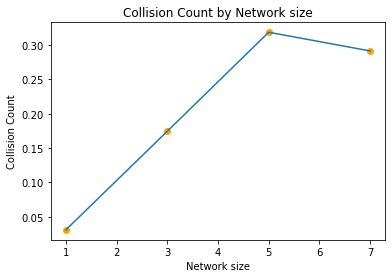

In [27]:
configurable_params = ["num_nodes", "edge_prob", "network_size"]

pretty_names = {"num_nodes": "Number of nodes", "edge_prob": "Edge probability", "network_size": "Network size"}

for param_name in configurable_params:
    param_change_results = get_grid_results(experiments, param_name, "collision_count")
    # plot collision probability by param_value
    plt.scatter(list(param_change_results.keys()), list(param_change_results.values()), c="orange")
    plt.plot(list(param_change_results.keys()), list(param_change_results.values()))
    # TODO: add x label and y label
    plt.xlabel(pretty_names[param_name])
    plt.ylabel("Collision Count")
    plt.title("Collision Count by " + pretty_names[param_name])
    plt.savefig("figures/" + "Collision Count" + "_" +  param_name + ".png")
    plt.show()

Text(0.5, 1.0, 'Collision Probability conditioned by model training')

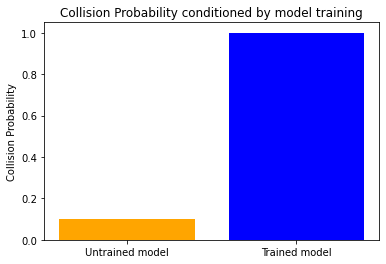

In [4]:
import matplotlib.pyplot as plt
untrained_model_value = 0.1
trained_model_value = 1

#plot values in bar plot
plt.bar(["Untrained model", "Trained model"], [untrained_model_value, trained_model_value], color=["orange", "blue"])
plt.ylabel("Collision Probability")
plt.title("Collision Probability conditioned by model training")
